### 1.Importing libs

In [141]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import os
import warnings
import time

**Set notebook variables**

In [142]:
t1 = time.time()
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')


### 2.Load dataset

In [143]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
housing.shape

(1460, 81)

### 3.Fetch dataset information

In [145]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [146]:
housing.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [147]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [148]:
def GetPivotTablePlot(Dataframe, _Index, _Values, _SortBy):
    """ This function enables multivariate plot through a pivot table data 

        Dataframe : The master datframe whose data need to analysed.

       _Index: The index of the pivot table.

       _Values: The basis on which pivot table will be made.
        
       _SortBy: The key on which the pivot table will be sorted.
    """


    sns.set(rc={'figure.figsize':(12,7)})
    Dataframe.pivot_table(values= _Values, index = _Index, aggfunc= 'mean').sort_values(_SortBy).plot.bar(color = 'g')
    plt.show()


### 4. EDA

**MSSubClass value counts**

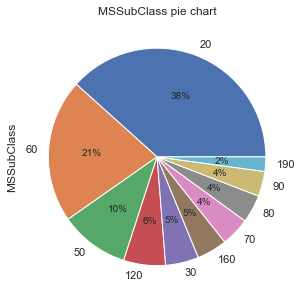

In [149]:
plt.figure(figsize=[5,5])
housing.MSSubClass.value_counts()[:10].plot.pie( autopct='%1.0f%%')
plt.title('MSSubClass pie chart')
plt.show()

**Sale price distribution**

Text(0.5, 1.0, 'Sale price distibution')

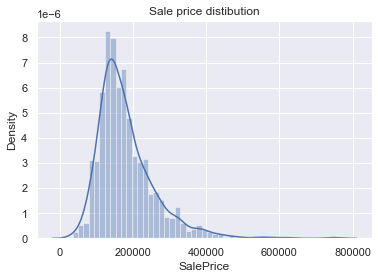

In [150]:
sns.distplot(housing.SalePrice)
plt.title('Sale price distibution')

Text(0.5, 1.0, 'Sale price distibution - logarithimic')

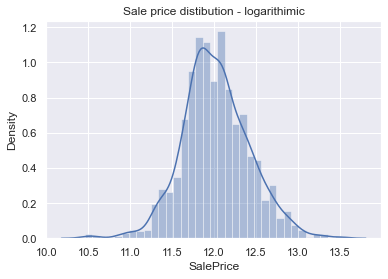

In [151]:
sns.distplot(np.log(housing.SalePrice))
plt.title('Sale price distibution - logarithimic')

**Observations**

* The target variables is highly left skewed.

* After taking the log of that, it shows a quite a normally ditributed cahracteristics, thus we can transform it.

* But, this transormation might hamper the perfomanaces of the regularization models thus we go ahead with original values itself.

<br>
<br>

**Lot area distibution**

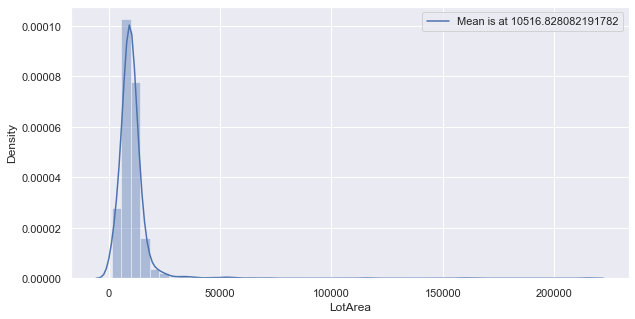

In [152]:
plt.figure(figsize=[10,5])
mean = housing.LotArea.mean()
sns.distplot(housing.LotArea)
plt.legend(["Mean is at {}".format(mean)])
plt.show()

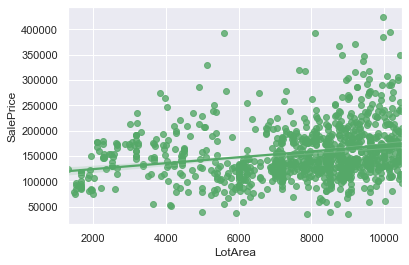

In [153]:
sns.regplot(housing[housing.LotArea<=mean].LotArea, housing[housing.LotArea<=mean].SalePrice, color ='g')
plt.show()

In [154]:
housing.groupby(['LotArea', 'GrLivArea']).SalePrice.mean().mean()

182068.65826330532

**Sale price wrt Lot area**

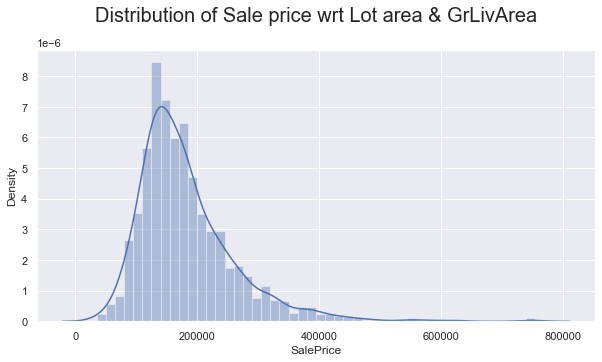

In [155]:
plt.figure(figsize=[10,5])
sns.distplot(housing.groupby(['LotArea', 'GrLivArea']).SalePrice.mean())
plt.title('Distribution of Sale price wrt Lot area & GrLivArea\n', fontsize =  20)
plt.show()

**MSSubClass, MSZoning & Saleprice relation**

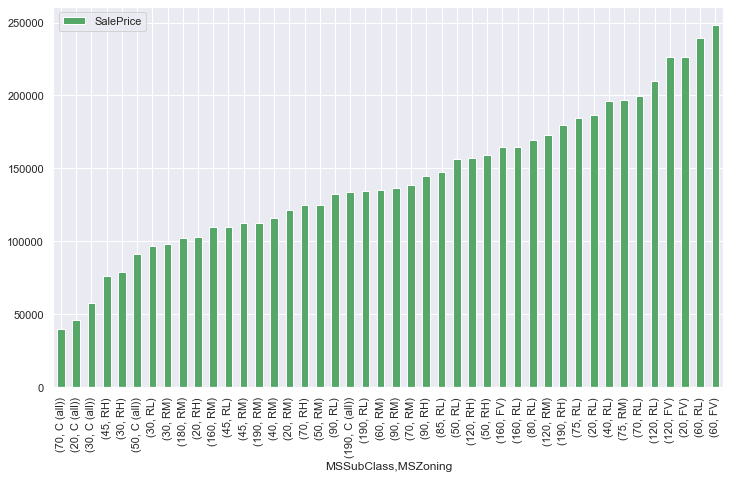

In [156]:
GetPivotTablePlot(housing,['MSSubClass', 'MSZoning'],'SalePrice', 'SalePrice' )

**MSZoning value counts**

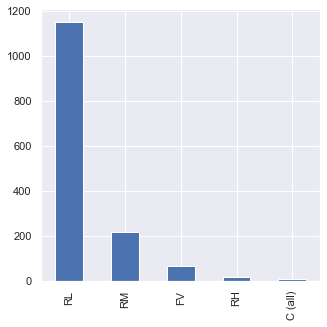

In [157]:
plt.figure(figsize=[5,5])
housing.MSZoning.value_counts().plot.bar()
plt.show()

In [158]:
housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

**LotShape, LandContour & landslope relations**

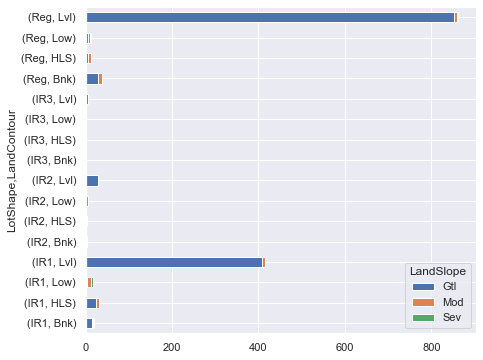

In [159]:
#plt.figure(figsize=[8,10])
sns.set(rc={'figure.figsize':(7,6)})
housing.groupby(['LotShape', 'LandContour']).LandSlope.value_counts().unstack().plot.barh(stacked=True)
plt.show()

**Neighborhood & SalePrice relation**

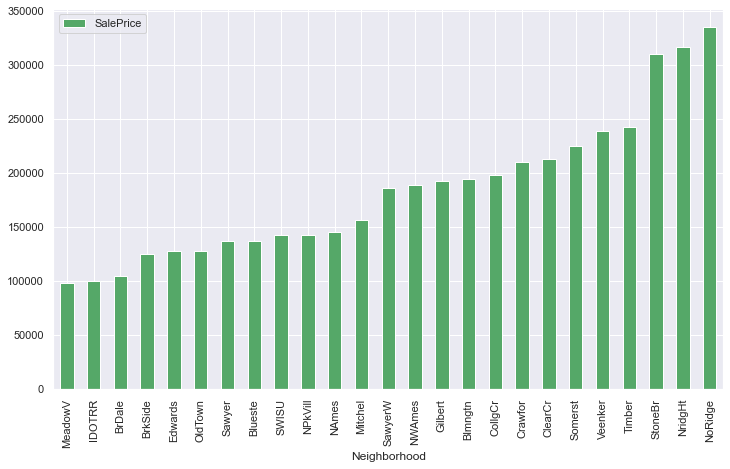

In [160]:
#housing.Neighborhood.value_counts().plot.barh()
#sns.set(rc={'figure.figsize':(12,7)})
#housing.pivot_table(values= 'SalePrice', index = ['Neighborhood'], aggfunc= np.mean ).sort_values('SalePrice').plot.bar(color = 'g')
#plt.show()
GetPivotTablePlot(housing,['Neighborhood'],'SalePrice', 'SalePrice' )

**BldgType, HouseStyle & OverallQual relation**

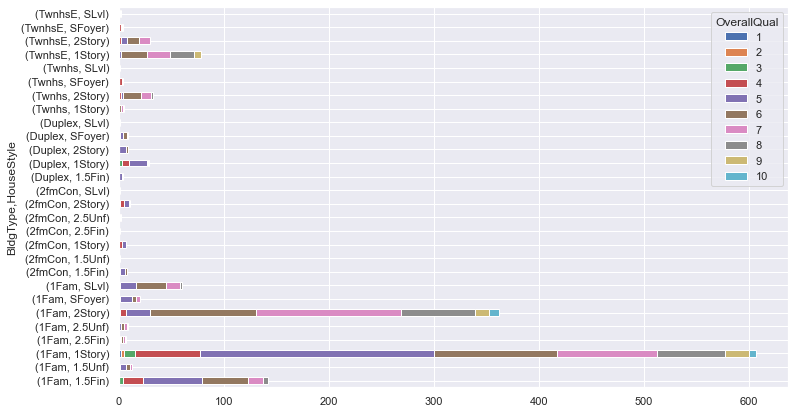

In [161]:
housing.groupby(['BldgType', 'HouseStyle']).OverallQual.value_counts().unstack().plot.barh(stacked=True)
plt.show()

**BldgType, HouseStyle & Saleprice relation**

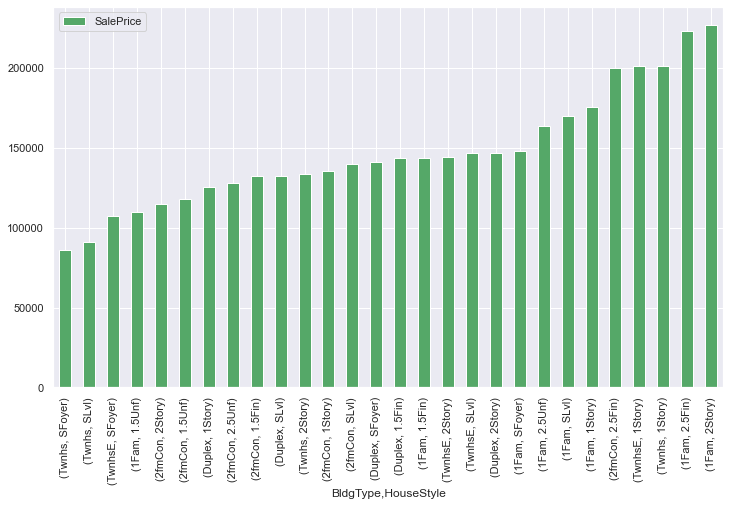

In [162]:
GetPivotTablePlot(housing, ['BldgType', 'HouseStyle'], 'SalePrice', 'SalePrice')

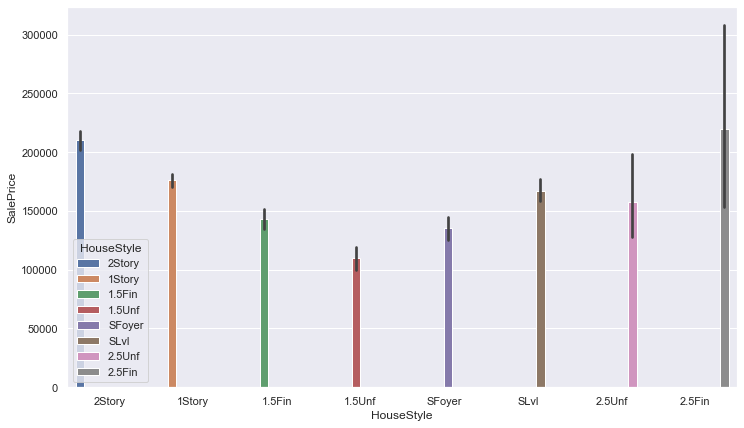

In [163]:
sns.barplot(data= housing, x = 'HouseStyle', y = 'SalePrice', hue = 'HouseStyle')
plt.show()

**Yearbuilt value counts**

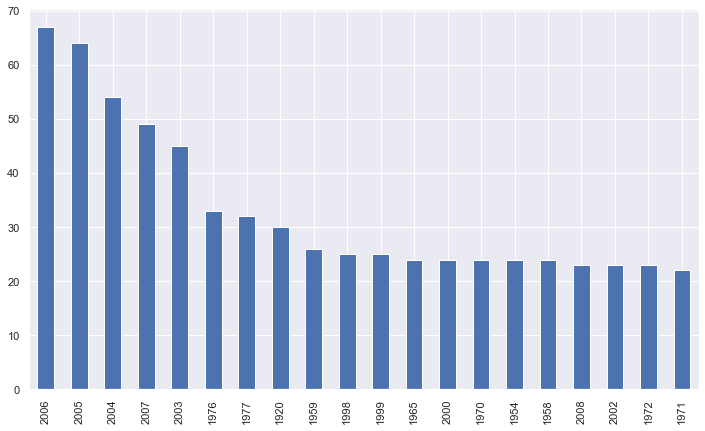

In [164]:
housing.YearBuilt.value_counts()[:20].plot.bar()
plt.show()

**RoofStyle and SalePrice realation**

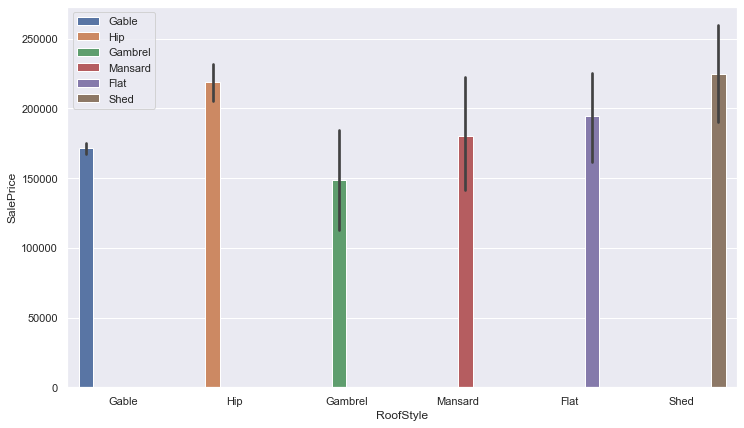

In [165]:
sns.barplot(data= housing, x = 'RoofStyle', y = 'SalePrice', hue = 'RoofStyle')
plt.legend(loc = 2)
plt.show()

**Data organization**

In [166]:
def GetFeaturesViaDatatypes(Dataframe, Datatypes):
    """Gets elements from dataframe with specified data types

    Dataframe : The master datframe whose data need to analysed.

    Datatypes : Datatypes of those features need to be extracted.

    """
    return Dataframe.select_dtypes(include=Datatypes).columns.values

In [167]:
# Extract the numerical data type features
numerical_features = GetFeaturesViaDatatypes(housing,['float64', 'int64'] )
numerical_features

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [168]:
def DeleteFromNpArray(InputArray, Elements):
    """Delete elements from a np array.

    InputArray : Input array from which elements will be deleted.

    Elements : Elements to be deleted from the array.

    """
    for element in Elements:
        indexes = np.where(InputArray == element)[0]
        InputArray = np.delete(InputArray, indexes)
    return InputArray

In [169]:
# Categorical features  with numebrs which need to be deleted from numerical features
num_categorical_features = ['MSSubClass',  'YearBuilt', 'YearRemodAdd',
                    'GarageYrBlt','GarageCars', 'OverallQual', 'OverallCond' ]

In [170]:
#These are though data types are numeric are actually categorical variables - ordinal type

numerical_features = DeleteFromNpArray(numerical_features, num_categorical_features)
numerical_features

array(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype=object)

In [171]:
# Delete the useless feature from numerical features

numerical_features = DeleteFromNpArray(numerical_features, ['Id'])
numerical_features

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

**Correlation matrix of all numerical features**

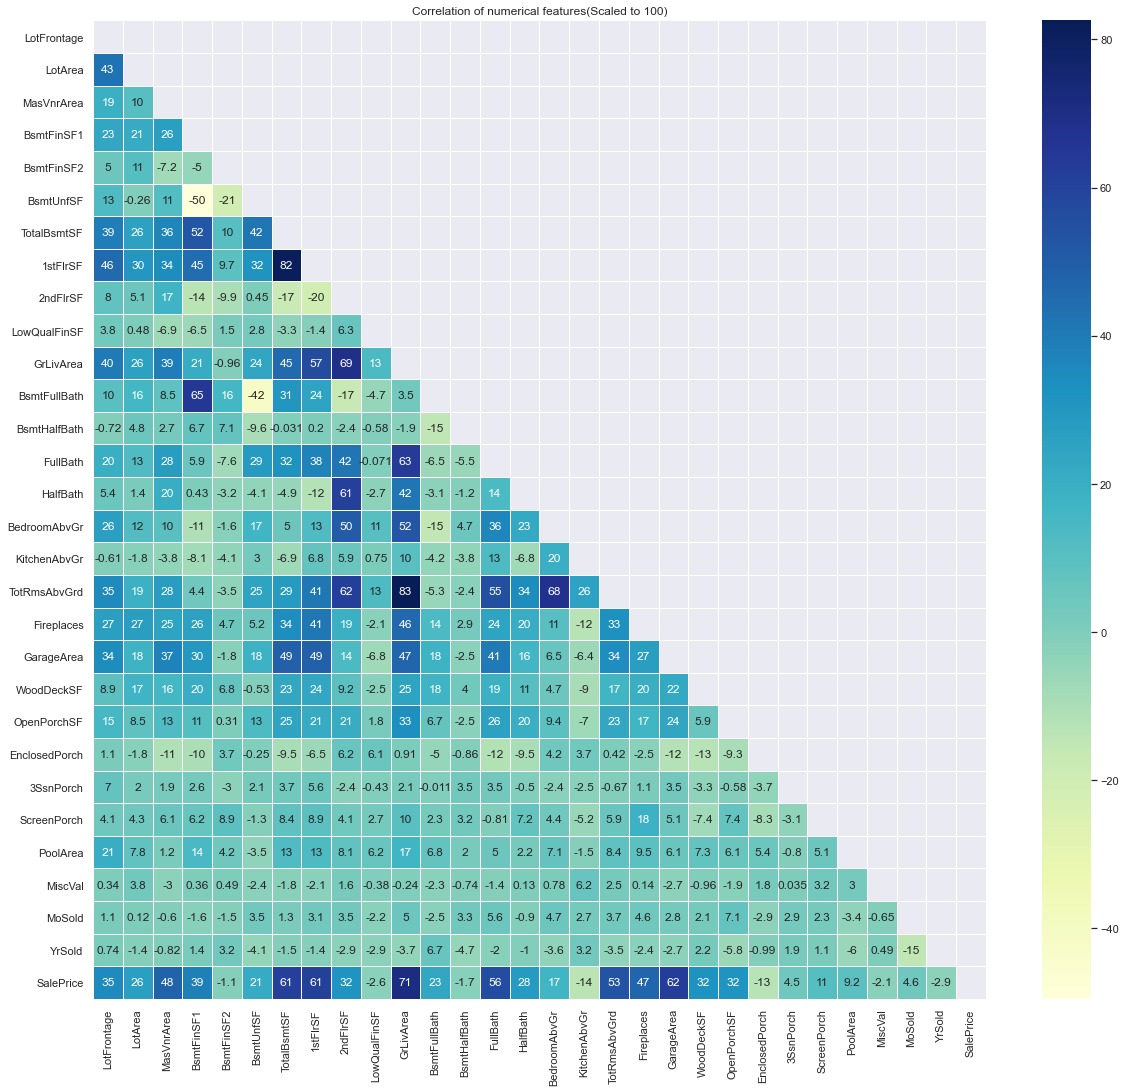

In [172]:
corr_mat = housing[numerical_features].corr()*100
plt.figure(figsize=[20,18])
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, cmap="YlGnBu", mask=mask,annot=True,linewidths=.5 , 
            annot_kws={"size": 12})
plt.title("Correlation of numerical features(Scaled to 100)")
plt.show()


**Observations**

* Features that show high(+/-ve) correlation are :
     
     * TotRmsAbvGrd & GrLivArea
     * 1stFlrSF & TotalBsmtSF
     * 2ndFlrSF & GrLivArea
     * TotRmsAbvGrd & BedroomAbvGr
     * BsmtFullbath & BsmtUnfSF
     * BsmtUnfSF & BsmtFinSF2


### 5.Dataset cleaning and transfomation

* Many variables are as categories so we need to do the transformation and create some derived columns/features

####  5.1 Data cleaning

In [173]:
def GetNulls(Dataframe):
    """Gets null percent of the different features in a dataframe.

     Dataframe : The master datframe whose data need to analysed.

    """
    null_df = pd.concat([Dataframe.isnull().sum(), Dataframe.isnull().sum()/len(Dataframe)*100], axis=1)
    null_df.columns = ['LabelNullCount', 'NullPercent']
    return null_df

In [174]:
GetNulls(housing).head()

,LabelNullCount,NullPercent
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000


In [175]:
GetNulls(housing)[GetNulls(housing).NullPercent>0]

,LabelNullCount,NullPercent
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


**Observations**

* Alley, PoolQC, MiscFeature, Fence are mostly empty so we can drop them

* For other missing terms we need to see the distribution and infer whether to impute them with mean or mode or use some other parameters

In [176]:
housing = housing.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1)

In [177]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Segregating the numerical and categorical features and thereby handling the null respectively**

#### 5.1.1 Numerical data cleaning & imputation

In [178]:
len(numerical_features)

30

In [179]:
housing[numerical_features].isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

**Lot frontage area data analysis**

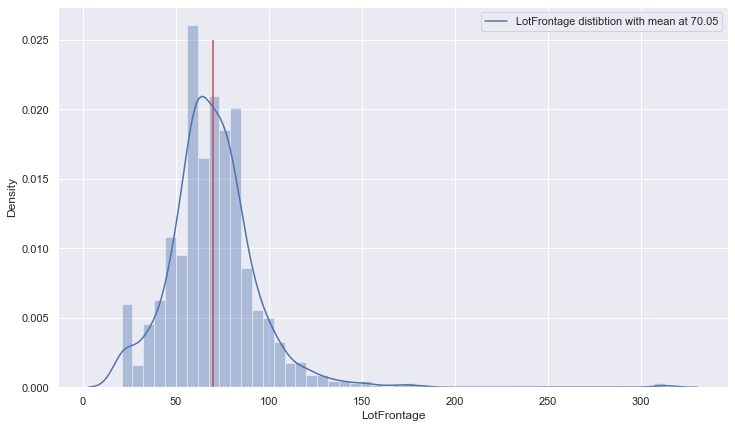

In [180]:
sns.distplot(housing.LotFrontage)
mean = housing.LotFrontage.mean()
plt.vlines(mean , ymax  = 0.025, ymin = 0, color = 'r')
plt.legend(['LotFrontage distibtion with mean at {}'.format(round(mean, 2))])
plt.show()

**Observations**

* LotFrontage is having 259 null readings and also the distribution shows almost symmetry, thus a normal distributuion which we will  replace them with mean.

In [181]:
#imputing with mean
housing.LotFrontage = housing.LotFrontage.fillna(housing.LotFrontage.mean())

**MasVnrArea area data analysis**

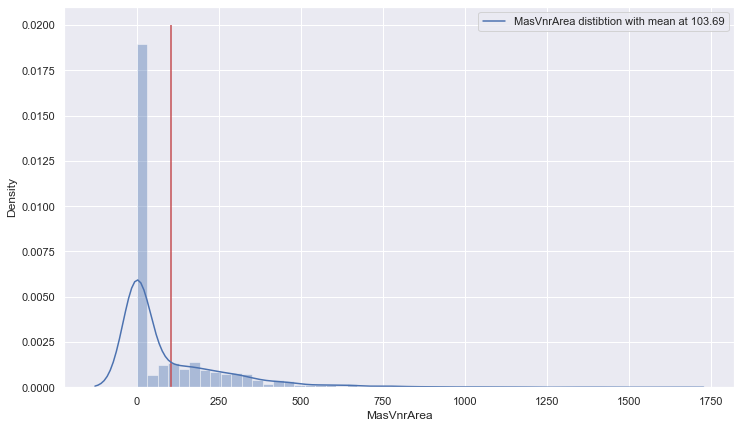

In [182]:
sns.distplot(housing.MasVnrArea)
mean = housing.MasVnrArea.mean()
plt.vlines(mean , ymax  = 0.020, ymin = 0, color = 'r')
plt.legend(['MasVnrArea distibtion with mean at {}'.format(round(mean, 2))])
plt.show()

**Observations**

* Only, MasVnrArea is having 8 null readings and also the distribution shows a right skewness, which we will replace them with median.

In [183]:
#imputing with median
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())

In [184]:
housing[numerical_features].isnull().sum().sum()

0

**Observations**
 * Hence all the numerical features have been treated for nulls

**Checking for zeros count in columns**

In [185]:
# Percentage of the quantity in each feature which are zeros

(housing[numerical_features] == 0).sum()/len(housing)*100

LotFrontage       0.000000
LotArea           0.000000
MasVnrArea       59.520548
BsmtFinSF1       31.986301
BsmtFinSF2       88.561644
BsmtUnfSF         8.082192
TotalBsmtSF       2.534247
1stFlrSF          0.000000
2ndFlrSF         56.780822
LowQualFinSF     98.219178
GrLivArea         0.000000
BsmtFullBath     58.630137
BsmtHalfBath     94.383562
FullBath          0.616438
HalfBath         62.534247
BedroomAbvGr      0.410959
KitchenAbvGr      0.068493
TotRmsAbvGrd      0.000000
Fireplaces       47.260274
GarageArea        5.547945
WoodDeckSF       52.123288
OpenPorchSF      44.931507
EnclosedPorch    85.753425
3SsnPorch        98.356164
ScreenPorch      92.054795
PoolArea         99.520548
MiscVal          96.438356
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
dtype: float64

**Observation**

* There are many features which are mostly zeros we will make a note of them and drop them altogether later. They are:
        
            1	PoolArea	99.520548
            2	3SsnPorch	98.356164
            3	LowQualFinSF	98.219178
            4	MiscVal	        96.438356
            5	BsmtHalfBath	94.383562
            6	ScreenPorch	92.054795
            7	BsmtFinSF2	88.561644
            8	EnclosedPorch	85.753425



#### 5.1.2 Categorical data cleaning & imputation

In [186]:
# Extract the categorical variables from the dataframe

categorical_features =  GetFeaturesViaDatatypes(housing,['object'])
categorical_features

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [187]:
# append the numerical categorical features to the categorical features

categorical_features = np.append(categorical_features, num_categorical_features) 
print(categorical_features)
print(len(categorical_features))

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'SaleType' 'SaleCondition' 'MSSubClass' 'YearBuilt' 'YearRemodAdd'
 'GarageYrBlt' 'GarageCars' 'OverallQual' 'OverallCond']
46


In [188]:
housing[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PavedDrive,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,GarageCars,OverallQual,OverallCond
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,WD,Normal,60,2003,2003,2003.0,2,7,5
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,WD,Normal,20,1976,1976,1976.0,2,6,8
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,WD,Normal,60,2001,2002,2001.0,2,7,5
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,WD,Abnorml,70,1915,1970,1998.0,3,7,5
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,WD,Normal,60,2000,2000,2000.0,3,8,5


**Since the numerical nulls are already traeted thus only nulls left are categorical ones**

In [189]:
GetNulls(housing)[GetNulls(housing).NullPercent>0]

,LabelNullCount,NullPercent
MasVnrType,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493
FireplaceQu,690,47.260274
GarageType,81,5.547945
GarageYrBlt,81,5.547945


In [190]:
categorical_nulls = GetNulls(housing)[GetNulls(housing).NullPercent>0].index.values
categorical_nulls

array(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'], dtype=object)

In [191]:
housing[categorical_nulls].head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


**Plot to understand the data in the null categorical features**

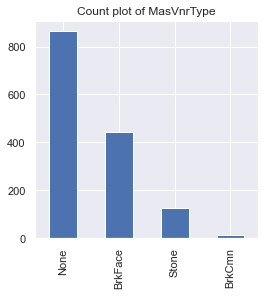

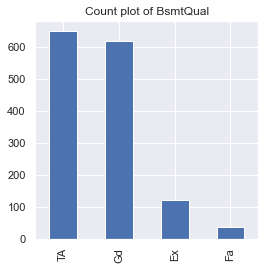

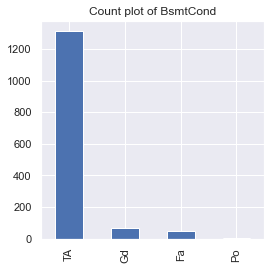

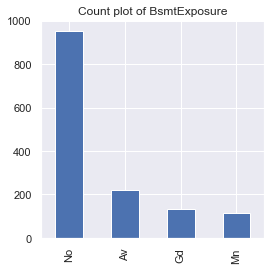

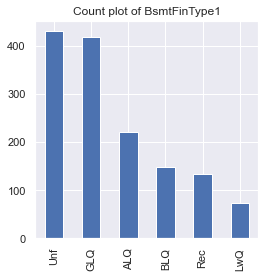

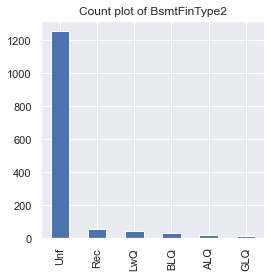

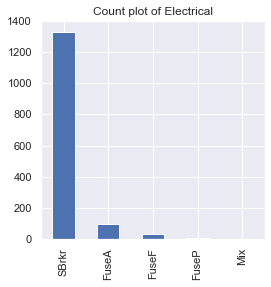

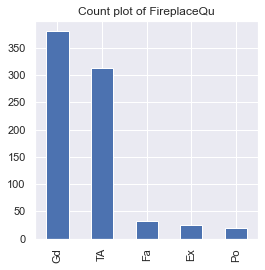

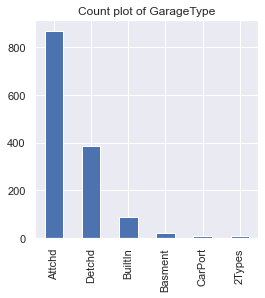

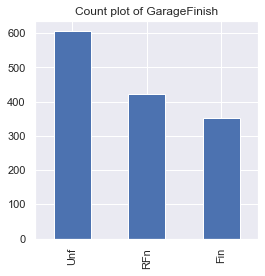

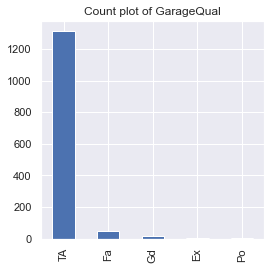

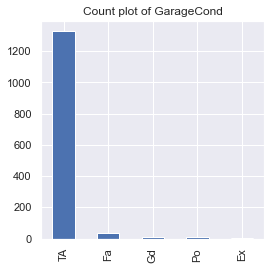

In [192]:

for feature_name in DeleteFromNpArray(categorical_nulls, ['GarageYrBlt']):
    plt.figure(figsize=[4,4])
    housing[feature_name].value_counts().plot.bar()
    plt.title("Count plot of {}".format(feature_name))
    plt.show()

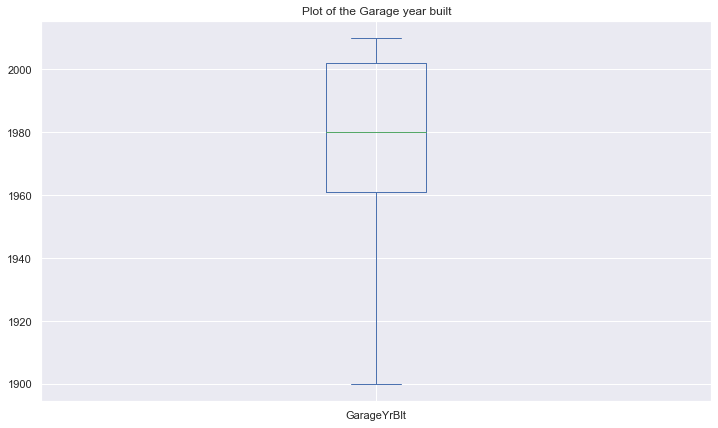

In [193]:
housing.GarageYrBlt.plot.box()
plt.title('Plot of the Garage year built')
plt.show()

**Observations**

* The null data distibution shows one dominant category thus mode will be the correct one to do imputation.

In [194]:
# Imputation with mode
for feature_name in categorical_nulls:
    housing[feature_name] = housing[feature_name].fillna(housing[feature_name].mode()[0])

In [195]:
housing[categorical_nulls].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [196]:
housing.isnull().sum().sum()

0

**Observations**
 * Hence all the categorical features have been treated for nulls

#### 5.2 Deleting unneccasary features

In [197]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [198]:
len(housing.columns)

77

In [199]:
all_features = np.append(numerical_features, categorical_features)
print(all_features)
len(all_features)

['LotFrontage' 'LotArea' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'SalePrice' 'MSZoning' 'Street'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition' 'MSSubClass' 'YearBuilt' 'YearRemodAdd' 'GarageYrBlt'
 'GarageCars' 'OverallQual' 'OverallCond']


76

**Data Inferences**

* There are many features which are not important from business perspective

* There also features which are having almost 80% rows as zeros.

* There are features which doesn't add any information to model.

**Hence those features will be dropped from the dataframe.**


In [200]:
delete_vars = ['LandSlope', 'Condition2','YearRemodAdd', 'RoofMatl', 'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtFinSF1', 
               'BsmtFinType2', 'BsmtFinSF2' , 'BsmtUnfSF', 'HeatingQC', '1stFlrSF',	'2ndFlrSF',	'LowQualFinSF','TotRmsAbvGrd',                       'BsmtFullBath', 'BsmtHalfBath','FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',  'PoolQC',                 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'PoolArea' ]

len(delete_vars)

30

**There are ordinal features - like review which needs further treatment**

In [201]:
review_features = ['ExterQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageCond']
len(review_features)

6

In [202]:
# Deleting all the unneccessary features from the consideration

all_features = DeleteFromNpArray(all_features, delete_vars )
all_features

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice',
       'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass',
       'YearBuilt', 'OverallQual', 'OverallCond'], dtype=object)

In [203]:
len(all_features)

49

**Sanity check**

In [204]:
numerical_features = all_features[np.isin(all_features, numerical_features)]

In [205]:
categorical_features = all_features[np.isin(all_features, categorical_features)]

In [206]:
len(categorical_features) + len(numerical_features)  == len(all_features)

True

#### 5.3 Data transformation

* We need to optimize the features so as to make some sense out of it. Some techniques we will use are:
    * Binning
    * ordinal encoding for ordinal data types
    * One-hot/dummy encoding for nominal data types

#### 5.3.1 Derived Features

**Derived feature -> HouseQuality is made by taking a mean of Overall quality and condition review**

In [207]:
housing['HouseQuality']  = np.trunc((housing.OverallQual + housing.OverallCond)/2)

In [208]:
def GetReviewInNumerics(Review):
    """Mapping function which converts the string review to numerical ones.

    Review: String review.

    """
    review_map = {"Ex": 5, 'Gd': 4, "TA": 3, 
                  "Fa" : 2, "Po": 1, "NA": 0}

    return review_map[Review]

In [209]:
# Converting the string reviews to numerical ones

for feature_name in review_features:
    housing[feature_name] = housing[feature_name].apply(lambda x: GetReviewInNumerics(x))

housing[review_features].head()

,ExterQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageCond
0,4,3,5,4,4,3
1,3,3,5,3,3,3
2,4,3,5,4,3,3
3,3,4,4,4,4,3
4,4,3,5,4,3,3


**Derived feature -> TotalPorchArea is made by taking a sum of area of OpenPorchSF, EnclosedPorch, ScreenPorch and 3SsnPorch**

In [210]:
housing['TotalPorchArea']  = (housing.OpenPorchSF+	housing.EnclosedPorch	+  housing['3SsnPorch']	+housing.ScreenPorch)

**Derived feature -> Age is made by taking a difference between YearBuilt and present year**

In [211]:
housing["Age"] = housing.YearBuilt.apply(lambda x: (2021- x))

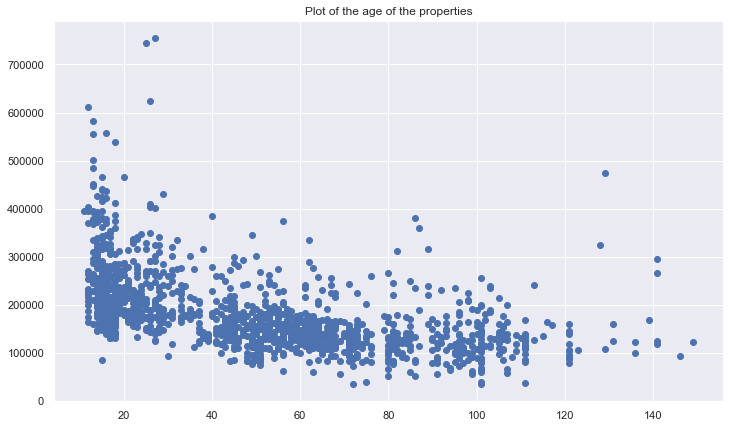

In [212]:
plt.scatter(housing.Age, housing.SalePrice)
plt.title("Plot of the age of the properties")
plt.show()

In [213]:
# all the features whose derived quantities are made 
deriving_features = ['OverallQual', 'OverallCond', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YearBuilt']

**Delete the duplicate deriving features**

In [214]:
housing = housing.drop(deriving_features, axis = 1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseQuality,TotalPorchArea,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,6.0,61,18
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,7.0,0,45
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,6.0,42,20
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,6.0,307,106
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,6.0,84,21


**Add the derived features to numerical feature array**

In [215]:
numerical_features = np.append(numerical_features, ['TotalPorchArea', 'Age'])
numerical_features

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice',
       'TotalPorchArea', 'Age'], dtype=object)

**Delete the numerical type deriving features from numerical feature array**

In [216]:
numerical_features = DeleteFromNpArray(numerical_features, deriving_features)
numerical_features

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'SalePrice',
       'TotalPorchArea', 'Age'], dtype=object)

<br>
<br>

**Delete the deriving features and review featres from categorical feature array**

* Reason were deleting review features is beacuse they are *oridinal in nature and should not be generalized like other categorical features*.

In [217]:
categorical_features = DeleteFromNpArray(categorical_features, deriving_features)
categorical_features = DeleteFromNpArray(categorical_features, review_features)
categorical_features

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype=object)

**Add the derived feature to review feature array**

In [218]:
review_features = np.append(review_features, 'HouseQuality' )

<br>
<br>
<br>

In [219]:
len(categorical_features)

25

In [220]:
len(numerical_features)

15

In [221]:
len(review_features)

7

#### 5.3.2 Level Elimnination of categorical features

* Transforming the multilevel categoricals variables to lower number of levels.

<br>
<br>

In [222]:
count_register = 0
def GetFrequencyPercentage(Dataframe, FeatureName):
    """Get the frequency % of value counts the different levels of a categorical variable in a dataframe.

    Dataframe : The master datframe whose data need to analysed.

    FeatureName : Feature whose value counts need to fetched.
    
    """
    global count_register
    val_counts = Dataframe[FeatureName].value_counts()
    count_register += len(val_counts.values)
    return val_counts/len(Dataframe)*100

In [223]:
def ShowCategoricalValueCounts(Dataframe, CategoricalFeatures):
        """Display the frequency % of value counts the different levels of  categorical variables in a dataframe.

        Dataframe : The master datframe whose data need to analysed.

        CategoricalFeatures : Features whose value counts need to fetched.
    
        """
        for feature_name in CategoricalFeatures:
            print(" |{}|\t|Frequency Percentage| \n {} \n".format(feature_name, GetFrequencyPercentage(Dataframe, feature_name)))

In [224]:
ShowCategoricalValueCounts(housing,categorical_features )

 |MSZoning|	|Frequency Percentage| 
 RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64 

 |Street|	|Frequency Percentage| 
 Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64 

 |LotShape|	|Frequency Percentage| 
 Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64 

 |LandContour|	|Frequency Percentage| 
 Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64 

 |Utilities|	|Frequency Percentage| 
 AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64 

 |LotConfig|	|Frequency Percentage| 
 Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64 

 |Neighborhood|	|Frequency Percentage| 
 NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilber

In [225]:
print("Total number of categorical levels in {} categorical features is {}".format(len(categorical_features), count_register))
count_register = 0

Total number of categorical levels in 25 categorical features is 169


**Observations**

* Dealing with 169 levels for 25 categorical feature is way too much thus some sort of binning technique need to be done.

* We can observe that in most feature, one category level is highly prevalent while others are less, thus for the sake of generalizing the model, we will do a trade-off of converting all other reccessive(less frequent) levels to one level as *Others*.



In [226]:
def GetFilteredLabelName(index, values, label, cut_off ):
    """Filters the levels on the basis of the cut-off comaparing it with each level's qunatity %.

    index : Feature name whose value counts need to analysed.

    values : Quantity % of each feature's levels.

    label : Its the label with which we are comparing the present feature name.

    cut_off :  
               label_name = label  if values => cut_off

               label_name = Others  if values < cut_off
    
    """
    ClassName = np.nan
    i = 0
    for i in range(len(values)):
        if index[i] == label:
            if values[i] < cut_off:
                ClassName = "Others"
            else:
                ClassName = label
            return ClassName

**Iterating through all the categorical features to change the levels based on the set cut-off**

* Cut-off = 2%

    * So, if the value count % is  > than cut off, the level rertains its level name.
    
    * Otherwise it iwll given name as *Others*.

In [227]:
for feature_name in housing[categorical_features]:
    value_counts = housing[feature_name].value_counts()
    values = value_counts.values.reshape(-1,1)/len(housing)*100
    index = value_counts.index.values.reshape(-1,1)
    housing[feature_name] = housing[feature_name].apply(lambda x: GetFilteredLabelName( index, values, x, 2) )

In [228]:
ShowCategoricalValueCounts(housing,categorical_features)

 |MSZoning|	|Frequency Percentage| 
 RL        78.835616
RM        14.931507
FV         4.452055
Others     1.780822
Name: MSZoning, dtype: float64 

 |Street|	|Frequency Percentage| 
 Pave      99.589041
Others     0.410959
Name: Street, dtype: float64 

 |LotShape|	|Frequency Percentage| 
 Reg       63.356164
IR1       33.150685
IR2        2.808219
Others     0.684932
Name: LotShape, dtype: float64 

 |LandContour|	|Frequency Percentage| 
 Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64 

 |Utilities|	|Frequency Percentage| 
 AllPub    99.931507
Others     0.068493
Name: Utilities, dtype: float64 

 |LotConfig|	|Frequency Percentage| 
 Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
Others      0.273973
Name: LotConfig, dtype: float64 

 |Neighborhood|	|Frequency Percentage| 
 NAmes      15.410959
CollgCr    10.273973
Others     10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.8

In [229]:
print("Total number of categorical levels in {} categorical features is {}".format(len(categorical_features), count_register))
count_register = 0

Total number of categorical levels in 25 categorical features is 119


<br>
<br>


**Observation**

* With a cut-off only 2%, we get are able to lower the levels from 169 to 119 in the categorical features which is a reduction of almost 30%.

* So any thing whose level quantity is more than cut-off % of total data qunatity, will be preseved with orginal name, whereas if any quantities which are 5% will be allotted to *Others* category.

#### 5.4 Dummy Encoding

In [230]:
def ConvertToDummies(Dataframe, LabelNames):
    """Converts the Dataframe to dummy dataframe.

    Dataframe : The master datframe whose data need to modified.

    LabelNames : Feature which will be operated.

    """
    dummy = pd.get_dummies(Dataframe[LabelNames], drop_first= True)
    return dummy

<br>

**Converting all the categorical features to dummy variables - dummy encoding**

In [231]:
categorical_df = ConvertToDummies(housing, categorical_features)
categorical_df.head()

,MSZoning_Others,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_Others,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Others
0,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### 5.5 Final dataframe

In [232]:
master_df = pd.concat([housing[numerical_features],housing[review_features], categorical_df], axis = 1)

In [233]:
master_df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,...,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Others
0,65.0,8450,196.0,856,1710,2,1,3,1,0,...,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,0.0,1262,1262,2,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,162.0,920,1786,2,1,3,1,1,...,0,0,1,0,0,0,0,0,0,0
3,60.0,9550,0.0,756,1717,1,0,3,1,1,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,350.0,1145,2198,2,1,4,1,1,...,0,0,1,0,0,0,0,0,0,0


In [234]:
pd.DataFrame(master_df.columns, columns=['Feature Names'])

,Feature Names
0,LotFrontage
1,LotArea
2,MasVnrArea
3,TotalBsmtSF
4,GrLivArea
5,FullBath
6,HalfBath
7,BedroomAbvGr
8,KitchenAbvGr
9,Fireplaces


<br>
<br>

#### 5.6 Split and scaling

In [235]:
y = master_df.pop('SalePrice')
X = master_df

In [236]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [237]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [238]:
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_train[X_train.columns].head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,...,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Others
210,0.157534,0.019306,0.00,0.141408,0.081860,0.333333,0.0,0.250,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.236301,0.039403,0.16,0.220458,0.424289,0.666667,0.5,0.500,0.0,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.106164,0.033981,0.00,0.120295,0.201576,0.333333,0.5,0.375,0.0,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.130137,0.017931,0.00,0.079378,0.230015,0.333333,0.0,0.250,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,0.133562,0.046139,0.00,0.127169,0.355880,0.666667,0.0,0.500,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<br>

**Scale the test set**

In [239]:
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])
X_test[X_test.columns].head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,...,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Others
1436,0.133562,0.035192,0.00000,0.141408,0.081860,0.333333,0.0,0.375,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.232877,0.047566,0.00000,0.140753,0.246349,0.666667,0.5,0.375,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.143836,0.029930,0.02375,0.202455,0.156610,0.666667,0.0,0.375,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.198630,0.036338,0.00000,0.153682,0.261145,0.666667,0.5,0.375,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1170,0.188356,0.039309,0.00000,0.179378,0.130669,0.333333,0.0,0.375,0.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<br>
<br>

### 6.Model Building

#### 6.1 Linear Regression

In [240]:
lm_rfe = LinearRegression()

In [241]:
len(X_train.columns)

115

*As we can see that we have 115 features, model building with this many might create issues like overfitting, complexity thus we take help of RFE to take kick-start with some lower number of features and apply to linear regression and then feed to regularization wihich will further take care of the issues mentioned earlier and give only those features that constribute most to predict target variables.*

**RFE**

In [242]:
def GetRFEFeatures(RegressionObject, VariableCount, X_train, y_train ):
    """Function to extract the best features wrt regression model given. 

    RegressionObject : Regression class object.

    VariableCount : # of top features to be extracted.

    X_train, y_train : Train dataset.

    """
    RegressionObject.fit(X_train, X_train)
    rfe = RFE(RegressionObject, VariableCount)            
    rfe = rfe.fit(X_train, y_train)
    return rfe


**Selecting top 100 features via RFE**

In [243]:
RFE_ = GetRFEFeatures(lm_rfe, 100, X_train, y_train)

In [244]:
list(zip(X_train.columns,RFE_.support_,RFE_.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('TotalPorchArea', True, 1),
 ('Age', True, 1),
 ('ExterQual', True, 1),
 ('BsmtCond', False, 13),
 ('HeatingQC', True, 1),
 ('KitchenQual', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageCond', True, 1),
 ('HouseQuality', True, 1),
 ('MSZoning_Others', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 16),
 ('LotShape_Others', True, 1),
 ('LotShape_Reg', False, 5),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('Utilities_Others', True, 1),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_Inside', True, 1),
 ('LotConfig_Others', True, 1),
 ('N

In [245]:
col = X_train.columns[RFE_.support_]
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'TotalPorchArea', 'Age', 'ExterQual',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageCond', 'HouseQuality',
       'MSZoning_Others', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LotShape_Others', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_Others', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_Inside', 'LotConfig_Others',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Others', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm',
       'BldgType_2fmCon', 'BldgType_Duplex', 'Bld

**Only taking into account of those features that are mapped by RFE**

In [246]:
X_train = X_train[col]
X_test = X_test[col]

In [247]:
lm = LinearRegression()

In [248]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

**Function get model metrics to evaluate the performance**

In [249]:
def GetModelMetrics(Model, ModelName,X_train, y_train, X_test, y_test ):    
    """Gets the model performance wrt r2 score, MSE and RSS.

    Model : Model object.

    ModelName : Name of modelis being used presently.

    X_train, y_train:Train set of predicting and predicted variables.

    X_test, y_test : Test set of predicting and predicted variables.

    """
    y_pred_train = Model.predict(X_train)
    y_pred_test = Model.predict(X_test)

    metrics = [ModelName]

    # r2 score on train
    r2_train = r2_score(y_train, y_pred_train)
    output = "r2 score train : {}".format(r2_train)
    metrics.append(output)

     # r2 score on test
    r2_test = r2_score(y_test, y_pred_test)
    output = "r2 score test : {}".format(r2_test)
    metrics.append(output)

    # rss on train
    rss_train = np.sum(np.square(y_train - y_pred_train))
    output = "rss train : {}".format(rss_train)
    metrics.append(output)

    # rss on test
    rss_test = np.sum(np.square(y_test - y_pred_test))
    output = "rss test : {}".format(rss_test)
    metrics.append(output)

    # mse on train
    mse_train = mean_squared_error(y_train, y_pred_train)
    output = "mse train : {}".format(mse_train*0.5)
    metrics.append(output)

    # mse on test
    mse_test = mean_squared_error(y_test, y_pred_test)
    output = "mse test : {}".format(mse_test*0.5)
    metrics.append(output)

    return metrics

In [250]:
GetModelMetrics(lm, 'Linear Regression', X_train, y_train, X_test, y_test )

['Linear Regression',
 'r2 score train : 0.8650294519981037',
 'r2 score test : -1.6645365025415362e+21',
 'rss train : 861206413600.4623',
 'rss test : 4.691849896939325e+33',
 'mse train : 421746529.6770139',
 'mse test : 5.355993033035759e+30']

**Observations**

* Model is overfitting, as R2 score is *decreasing* RSS and MSE are *increasing* a lot from train to test data

<br>
<br>

#### 6.2 L2 Regularization - Ridge

* Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients.

* Minimization objective = LS Obj +  λ* (sum of square of coefficients)

In Sklearn, λ -> α



In [251]:
# All the lamda value for which grid search will happen

params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                    0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 30,  50, 70,  90, 100, 500, 1000, 1500, 2000 ]}

In [252]:
def CrossValidation(FoldCount, Estimator, ParamGrid, Input, Output):
    """K fold cross-validation on top of the parameters and the model specified as neg_mean_absolute_error as basis.

    FoldCount : # of K-folds.

    Estimator : Model object. 

    ParamGrid : Hyperparamter values to be tested.

    Input, Output : Predicting and predicted variables

    """
    model_cv = GridSearchCV(estimator = Estimator, 
                            param_grid = ParamGrid, 
                            scoring= 'neg_mean_absolute_error',  
                            cv = FoldCount, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(Input, Output) 
    return model_cv

In [253]:
lambda_ridge = CrossValidation(5, Ridge(), params, X_train, y_train).best_params_
lambda_ridge = lambda_ridge['alpha']
print("\nBest lambda for ridge is ",lambda_ridge)

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best lambda for ridge is  0.8


In [254]:
ridge = Ridge(alpha=lambda_ridge)

ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [255]:
GetModelMetrics(ridge, 'Ridge Regression Metrics', X_train, y_train, X_test, y_test )

['Ridge Regression Metrics',
 'r2 score train : 0.8621108926910579',
 'r2 score test : 0.8441544395774734',
 'rss train : 879828861467.1318',
 'rss test : 439283833962.4437',
 'mse train : 430866239.6998687',
 'mse test : 501465563.8840682']

In [256]:
def GetModelCoeffiecients(Indexes, Model, ModelName, DisplayCount):
    betas = pd.DataFrame(index=Indexes)
    betas.rows = Indexes
    betas[ModelName] = Model.coef_
    pd.set_option('display.max_rows', None)
    return betas.head(DisplayCount)

#### 6.3 Display Ridge Reg Coefficients

In [257]:
ridge_reg_coeff = GetModelCoeffiecients(X_train.columns, ridge,'Ridge', len(X_train.columns)).Ridge.sort_values(ascending = False)

In [258]:
ridge_reg_coeff

GrLivArea                210342.670254
HouseQuality              79148.969211
Neighborhood_NoRidge      56066.299580
GarageArea                47286.801363
LotArea                   44343.776353
Neighborhood_NridgHt      43220.800466
MasVnrArea                39594.007559
FullBath                  32030.375389
KitchenQual               31170.472539
Fireplaces                28374.371357
FireplaceQu               25539.181949
Neighborhood_Somerst      24514.589237
LandContour_HLS           24476.303895
BsmtExposure_Gd           22176.365319
Neighborhood_Crawfor      21810.065844
ExterQual                 21643.967374
TotalBsmtSF               21009.289888
HalfBath                  20017.729266
LandContour_Lvl           19376.269046
LandContour_Low           17203.019696
SaleType_Others           14755.132684
HouseStyle_Others         12062.198432
WoodDeckSF                11107.718010
HouseStyle_1Story         10858.948419
TotalPorchArea            10771.232543
MSZoning_RM              

**Observations**

* Ridge regression takes care of the overffitting and the train and test scores quite close.

<br>
<br>

#### 6.4 L1 Regularization - Lasso

* Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients

* Minimization objective = LS Obj + λ * (sum of absolute value of coefficients)

In Sklearn, λ -> α

In [259]:
lambda_lasso = CrossValidation(5, Lasso(), params, X_train, y_train ).best_params_
lambda_lasso = lambda_lasso['alpha']
print("\nBest lambda for lasso is ", lambda_lasso)

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best lambda for lasso is  100


In [260]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
lasso = Lasso(alpha=lambda_lasso)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [261]:
GetModelMetrics(lasso, 'Lasso Regression Metrics', X_train, y_train, X_test, y_test )

['Lasso Regression Metrics',
 'r2 score train : 0.8574943257208336',
 'r2 score test : 0.844844460771421',
 'rss train : 909285784791.7473',
 'rss test : 437338862576.85645',
 'mse train : 445291765.32406825',
 'mse test : 499245276.9142197']

**Observations**

* Lasso regression takes care of the overffitting and the train and test scores quite close.

#### 6.5 Display Lasso Reg Coefficients

In [262]:
lasso_reg_coeff = GetModelCoeffiecients(X_train.columns, lasso,'Lasso', len(X_train.columns)).Lasso.sort_values(ascending = False)
      

In [263]:
lasso_reg_coeff

GrLivArea                269169.318413
HouseQuality              81827.381878
Neighborhood_NoRidge      54885.203877
Neighborhood_NridgHt      43790.953948
GarageArea                37243.827701
KitchenQual               31967.499572
Fireplaces                28932.810699
BsmtExposure_Gd           24678.753249
MasVnrArea                24612.329603
Neighborhood_Somerst      22185.213709
ExterQual                 21373.680762
Neighborhood_Crawfor      21200.669680
LandContour_HLS           20126.807481
FireplaceQu               19110.474761
FullBath                  16023.759544
HouseStyle_1Story         14920.925370
LandContour_Lvl           14529.619026
HalfBath                  13996.926046
LandContour_Low           12080.919486
SaleType_New              11040.113198
LotConfig_CulDSac          9987.590555
Functional_Typ             9857.481147
Neighborhood_Others        9661.598579
LotArea                    8631.743566
Condition1_Norm            8121.620266
BsmtFinType1_GLQ         

In [264]:
t2 = time.time()

print("Elapsed time for notebook run : {} seconds".format(round(t2-t1),2))

Elapsed time for notebook run : 27 seconds


### 7. Conclusion

* Regularization have substantially reduced our model complexity and performances from what we observed with the linear regression   alone.

* Ridge best lamda value = 0.8

* Lasso best lamda value = 100

### 8. Subjective Questions

### 8.1 
Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [265]:
print("Apha values of lasso and ridge are {} , {}".format(lambda_lasso, lambda_ridge))

Apha values of lasso and ridge are 100 , 0.8


In [266]:
lambda_lasso_double = 2*lambda_lasso
lambda_ridge_double = 2*lambda_ridge

Ridge

In [267]:
ridge = Ridge(alpha=lambda_ridge_double)

ridge.fit(X_train, y_train)

Ridge(alpha=1.6)

In [268]:
GetModelMetrics(ridge, 'Ridge Regression Metrics', X_train, y_train, X_test, y_test )

['Ridge Regression Metrics',
 'r2 score train : 0.8588161568823878',
 'r2 score test : 0.8416423124376352',
 'rss train : 900851578286.1068',
 'rss test : 446364798209.3387',
 'mse train : 441161399.7483383',
 'mse test : 509548856.40335464']

In [269]:
ridge_reg_coeff = GetModelCoeffiecients(X_train.columns, ridge,'Ridge', len(X_train.columns)).Ridge.sort_values(ascending = False)

In [270]:
ridge_reg_coeff[:10]

GrLivArea               166402.303722
HouseQuality             75484.055685
Neighborhood_NoRidge     57057.926734
GarageArea               49984.559620
Neighborhood_NridgHt     41293.981398
MasVnrArea               39145.367830
FullBath                 37499.199452
LotArea                  34811.587749
KitchenQual              33127.595169
TotalBsmtSF              31801.873614
Name: Ridge, dtype: float64

Lasso

In [271]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
lasso = Lasso(alpha=lambda_lasso_double)

lasso.fit(X_train, y_train)



Lasso(alpha=200)

In [272]:
GetModelMetrics(lasso, 'Lasso Regression Metrics', X_train, y_train, X_test, y_test )

['Lasso Regression Metrics',
 'r2 score train : 0.8499469735543332',
 'r2 score test : 0.8402688116527928',
 'rss train : 957443165699.7666',
 'rss test : 450236302082.02',
 'mse train : 468875203.57481223',
 'mse test : 513968381.37216896']

In [273]:
lasso_reg_coeff = GetModelCoeffiecients(X_train.columns, lasso,'Lasso', len(X_train.columns)).Lasso.sort_values(ascending = False)

In [274]:
lasso_reg_coeff[:10]

GrLivArea               253302.266266
HouseQuality             79492.335434
Neighborhood_NoRidge     54995.039084
Neighborhood_NridgHt     41464.226671
GarageArea               39097.675150
KitchenQual              35357.976302
Fireplaces               30739.713849
BsmtExposure_Gd          26180.550564
ExterQual                24900.478550
Neighborhood_Somerst     20919.385790
Name: Lasso, dtype: float64

### 8.2 
Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

So, 5 most import feature are as follows:

        1. GrLivArea
        2. HouseQuality
        3. Neighborhood_NoRidge
        4. Neighborhood_NridgHt
        5. GarageArea
    

In [275]:
Five_Imp_Features = ['GrLivArea','HouseQuality','Neighborhood_NoRidge','Neighborhood_NridgHt','GarageArea']
X_train_modified = X_train.drop(Five_Imp_Features, axis = 1)
X_test_modified = X_test.drop(Five_Imp_Features, axis = 1)

In [276]:
X_train_modified.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,...,SaleCondition_Partial,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Others
210,0.157534,0.019306,0.00,0.141408,0.333333,0.0,0.250,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.236301,0.039403,0.16,0.220458,0.666667,0.5,0.500,0.0,0.333333,0.396733,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.106164,0.033981,0.00,0.120295,0.333333,0.5,0.375,0.0,0.333333,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
986,0.130137,0.017931,0.00,0.079378,0.333333,0.0,0.250,0.0,0.000000,0.459743,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,0.133562,0.046139,0.00,0.127169,0.666667,0.0,0.500,0.5,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [277]:
lasso = Lasso(alpha=lambda_lasso)

lasso.fit(X_train_modified, y_train)

Lasso(alpha=100)

In [278]:
GetModelMetrics(lasso, 'Lasso Regression Metrics', X_train_modified, y_train, X_test_modified, y_test )

['Lasso Regression Metrics',
 'r2 score train : 0.7970315430804802',
 'r2 score test : 0.7989110592488089',
 'rss train : 1295080589398.093',
 'rss test : 566811917010.2554',
 'mse train : 634221640.2537184',
 'mse test : 647045567.3633052']

In [279]:
lasso_reg_coeff = GetModelCoeffiecients(X_train_modified.columns, lasso,'Lasso', len(X_train_modified.columns)).Lasso.sort_values(ascending = False)

In [280]:
lasso_reg_coeff[:10]

TotalBsmtSF     162473.821640
MasVnrArea       82638.785237
FullBath         74113.350129
ExterQual        58128.719279
KitchenQual      56954.743163
Fireplaces       46763.149839
HalfBath         35532.888335
LotArea          33498.443190
FireplaceQu      31250.077971
BedroomAbvGr     26191.221458
Name: Lasso, dtype: float64

Thus, after deleting the top 5 important features we get following top 5 features after rebuilding the model:

        1. TotalBsmtSF     
        2. MasVnrArea       
        3. FullBath        
        4. ExterQual       
        5. KitchenQual      